In [12]:
%load_ext autoreload
%autoreload 2
from model_AE import AE
import torch
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import random
from functions import create_dataloaders, train_epoch, val_epoch, init_model, dataloader_test
import torch.optim as optim
import datetime
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
NUMWORKERS = 4
batch_size = 2
seed = 13

lat_space = 10
num_epochs = 20
learning_rate = 0.0002

In [10]:
model = AE(lat_space=lat_space).to('cuda')
summary(model, (1, 56, 56))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]           3,200
       BatchNorm2d-2           [-1, 64, 56, 56]             128
              ReLU-3           [-1, 64, 56, 56]               0
         MaxPool2d-4           [-1, 64, 28, 28]               0
            Conv2d-5           [-1, 64, 28, 28]          36,928
       BatchNorm2d-6           [-1, 64, 28, 28]             128
              ReLU-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,928
       BatchNorm2d-9           [-1, 64, 28, 28]             128
          Dropout-10           [-1, 64, 28, 28]               0
             ReLU-11           [-1, 64, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          36,928
      BatchNorm2d-13           [-1, 64, 28, 28]             128
             ReLU-14           [-1, 64,

In [8]:
from model_test import CNN_AE
model = CNN_AE(lat_space, 'cuda')
summary(model, (1,56,56))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,088
       BatchNorm2d-2           [-1, 64, 28, 28]             128
         LeakyReLU-3           [-1, 64, 28, 28]               0
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5             [-1, 32, 7, 7]          32,800
       BatchNorm2d-6             [-1, 32, 7, 7]              64
           Dropout-7             [-1, 32, 7, 7]               0
         LeakyReLU-8             [-1, 32, 7, 7]               0
            Conv2d-9             [-1, 32, 7, 7]           9,248
      BatchNorm2d-10             [-1, 32, 7, 7]              64
          Dropout-11             [-1, 32, 7, 7]               0
        LeakyReLU-12             [-1, 32, 7, 7]               0
        MaxPool2d-13             [-1, 32, 3, 3]               0
           Conv2d-14             [-1, 1

In [3]:
use_gpu = torch.cuda.is_available()
device = 'cuda' if use_gpu else 'cpu'
if seed is not None:
    seed = int(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


 Training and testing with:
            Autoencoder traning set size: 60000
            Autoencoder testing set size: 10000
            


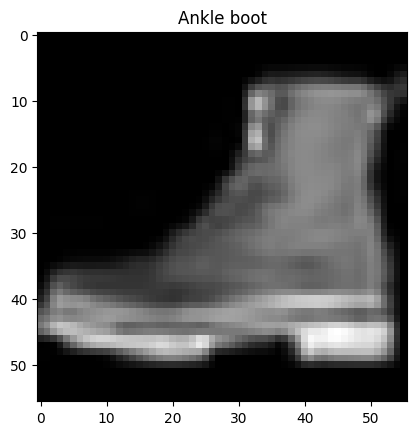

In [12]:
train_csv = "C:\\Users\\Robinumut\\Desktop\\archive\\fashion-mnist_train.csv"
test_csv = "C:\\Users\\Robinumut\\Desktop\\archive\\fashion-mnist_test.csv"
tr_loader, tst_loader = create_dataloaders(train_csv, test_csv, NUMWORKERS, batch_size, use_gpu)


for b in tr_loader:
    img, lbl = b['image'], b['label']
    break
image, label = img[13], lbl[13]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(tr_loader.dataset.idx2label(label.item()))
plt.axis('on')
plt.show()

938it [04:10,  3.74it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 1/10 	LOSS for train/val:452.943859 / 5590.781653


938it [04:15,  3.66it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 2/10 	LOSS for train/val:189.099480 / 7686.119009


938it [04:22,  3.58it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 3/10 	LOSS for train/val:164.683113 / 2445.086755


938it [04:22,  3.58it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 4/10 	LOSS for train/val:138.734252 / 3012.016479


938it [04:22,  3.58it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 5/10 	LOSS for train/val:126.668748 / 1001.414670


938it [04:23,  3.55it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 6/10 	LOSS for train/val:120.671698 / 1151.113332


938it [04:24,  3.55it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 7/10 	LOSS for train/val:115.323252 / 1047.880863


938it [04:24,  3.55it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 8/10 	LOSS for train/val:109.470368 / 1023.706615


938it [04:24,  3.55it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 9/10 	LOSS for train/val:108.595237 / 2317.344124


938it [04:24,  3.55it/s]                         


EPOCH 10/10 	LOSS for train/val:104.276835 / 1246.188280


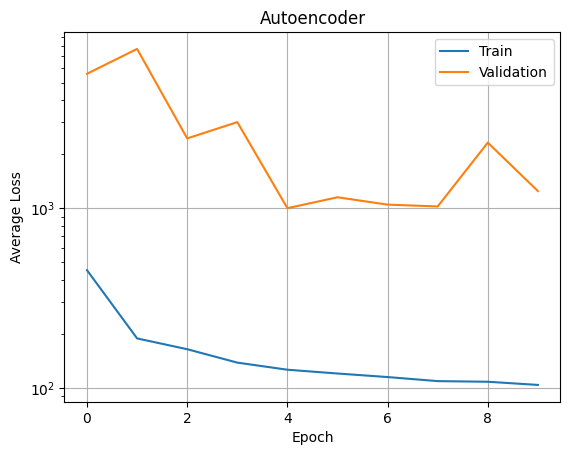

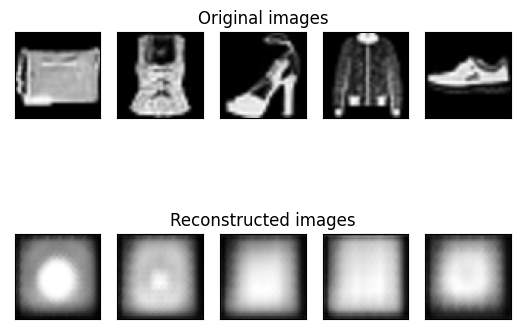

Total training time: 0:46:18.853132


In [13]:
ae, metrics = init_model('ae', Path('C:\\Users\\Robinumut\\Desktop\\archive'), device, lat_space)
tr, tst = dataloader_test()
loss_fn = torch.nn.MSELoss(reduction='sum')
optim = optim.Adam(ae.parameters(), lr=learning_rate)

t = datetime.datetime.now()
for epoch in range(1, num_epochs+1):
    train_loss = train_epoch(ae, tr, loss_fn, optim)
    val_loss = val_epoch(ae, tst, loss_fn)

    print('EPOCH {}/{} \tLOSS for train/val:'
            '{:3f} / {:3f}'
            .format(epoch, num_epochs, train_loss, val_loss))
    metrics.append(train_loss, val_loss)

metrics.plot(f'Autoencoder')
ae.plot_outputs(tst.dataset, 5)
print("Total training time:",datetime.datetime.now() - t)

938it [00:26, 35.50it/s]                         
  0%|          | 3/937 [00:00<00:39, 23.47it/s]

EPOCH 1/20 	LOSS for train/val:299.272237 / 226.407915


938it [00:27, 34.54it/s]                         
  0%|          | 3/937 [00:00<00:41, 22.57it/s]

EPOCH 2/20 	LOSS for train/val:297.416688 / 227.900057


938it [00:27, 34.30it/s]                         
  0%|          | 3/937 [00:00<00:38, 24.26it/s]

EPOCH 3/20 	LOSS for train/val:295.098074 / 229.455241


938it [00:26, 35.58it/s]                         
  0%|          | 3/937 [00:00<00:39, 23.68it/s]

EPOCH 4/20 	LOSS for train/val:294.217298 / 233.594723


938it [00:26, 35.35it/s]                         
  0%|          | 3/937 [00:00<00:42, 22.22it/s]

EPOCH 5/20 	LOSS for train/val:292.813492 / 225.753070


938it [00:26, 35.75it/s]                         
  0%|          | 3/937 [00:00<00:40, 23.19it/s]

EPOCH 6/20 	LOSS for train/val:292.839364 / 226.786117


938it [00:26, 35.22it/s]                         
  0%|          | 3/937 [00:00<00:38, 24.10it/s]

EPOCH 7/20 	LOSS for train/val:291.896510 / 227.446003


938it [00:26, 35.65it/s]                         
  0%|          | 3/937 [00:00<00:38, 24.11it/s]

EPOCH 8/20 	LOSS for train/val:290.093061 / 226.915380


938it [00:25, 36.46it/s]                         
  0%|          | 3/937 [00:00<00:41, 22.63it/s]

EPOCH 9/20 	LOSS for train/val:290.303995 / 227.725161


938it [00:26, 35.45it/s]                         
  0%|          | 3/937 [00:00<00:39, 23.53it/s]

EPOCH 10/20 	LOSS for train/val:289.756345 / 235.029095


938it [00:25, 36.25it/s]                         
  0%|          | 3/937 [00:00<00:38, 24.17it/s]

EPOCH 11/20 	LOSS for train/val:290.065112 / 225.315309


938it [00:26, 35.43it/s]                         
  0%|          | 3/937 [00:00<00:38, 24.54it/s]

EPOCH 12/20 	LOSS for train/val:289.068961 / 221.209516


938it [00:26, 36.02it/s]                         
  0%|          | 3/937 [00:00<00:40, 23.08it/s]

EPOCH 13/20 	LOSS for train/val:288.469968 / 223.829721


938it [00:25, 36.35it/s]                         
  0%|          | 2/937 [00:00<00:51, 18.25it/s]

EPOCH 14/20 	LOSS for train/val:288.916406 / 226.064271


938it [00:27, 33.86it/s]                         
  0%|          | 2/937 [00:00<00:55, 16.92it/s]

EPOCH 15/20 	LOSS for train/val:287.659141 / 231.285912


938it [00:27, 33.94it/s]                         
  0%|          | 2/937 [00:00<00:53, 17.59it/s]

EPOCH 16/20 	LOSS for train/val:287.399265 / 228.918849


938it [00:27, 33.95it/s]                         
  0%|          | 2/937 [00:00<00:58, 15.93it/s]

EPOCH 17/20 	LOSS for train/val:287.571826 / 232.585742


938it [00:27, 33.79it/s]                         
  0%|          | 2/937 [00:00<00:53, 17.43it/s]

EPOCH 18/20 	LOSS for train/val:286.707242 / 226.510685


938it [00:27, 33.91it/s]                         
  0%|          | 2/937 [00:00<00:51, 18.27it/s]

EPOCH 19/20 	LOSS for train/val:287.073404 / 225.822753


938it [00:27, 34.04it/s]                         


EPOCH 20/20 	LOSS for train/val:286.520430 / 231.966150


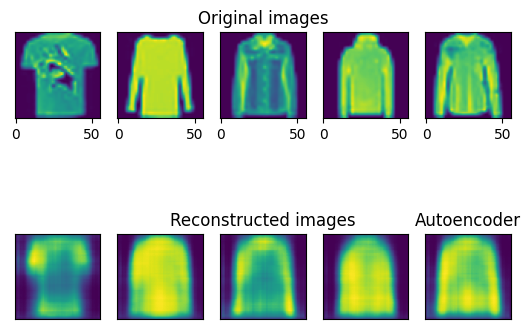

Total training time: 0:10:04.456376


In [13]:

tr, tst = dataloader_test()
loss_fn = torch.nn.MSELoss(reduction='sum')
optim = optim.Adam(model.parameters(), lr=learning_rate)

t = datetime.datetime.now()
for epoch in range(1, num_epochs+1):
    train_loss = train_epoch(model, tr, loss_fn, optim)
    val_loss = val_epoch(model, tst, loss_fn)

    print('EPOCH {}/{} \tLOSS for train/val:'
            '{:3f} / {:3f}'
            .format(epoch, num_epochs, train_loss, val_loss))
    #metrics.append(train_loss, val_loss)

#metrics.plot(f'Autoencoder')
model.plot_outputs(tst.dataset, 5)
print("Total training time:",datetime.datetime.now() - t)